# Лабораторная работа 3. Деревья и ансамбли


# Задание
  1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
  
- BaggingClassifier
- BaggingRegressor
- GradientBoostingClassifier
- GradientBoostingRegressor
- StackingClassifier
- StackingRegressor
 3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
- [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
- [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
- [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

Не забывайте про подготовку датасетов и подбор гиперпараметров.

In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc, r2_score, mean_absolute_percentage_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
#!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.datasets import make_classification, make_regression

**Загрузим предобработанные в прошлых лр датасеты**

In [2]:
data_reg = pd.read_csv('../data/mumbai.csv')
data_сlr = pd.read_csv('..\data\smoke_detector.csv')

In [3]:
data_сlr

,Unnamed: 0,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,50065,23.41,69.47,43.0,1120.0,13105.0,19890.0,931.239,14299.14,45432.26,21592.18,51914.680,30026.438,1.0
1,50064,23.00,70.28,50.0,1137.0,13094.0,19887.0,931.242,14333.69,45018.38,22959.95,51413.852,29590.688,1.0
2,50066,23.66,68.41,52.0,1141.0,13100.0,19882.0,931.251,14149.05,44786.43,21789.97,51167.711,29547.281,1.0
3,50124,25.86,62.03,546.0,1777.0,12872.0,19414.0,931.213,14318.17,44357.90,24472.12,50626.562,28964.852,1.0
4,50123,25.74,62.93,542.0,1710.0,12878.0,19426.0,931.215,14205.93,43765.07,24896.17,49936.551,28499.859,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,25001,13.00,53.20,0.0,400.0,12439.0,19114.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62626,25002,13.06,52.81,0.0,400.0,12448.0,19155.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62627,25142,11.81,50.49,31.0,445.0,12545.0,19632.0,939.810,0.00,0.00,0.00,0.001,0.000,0.0
62628,25143,11.69,51.08,28.0,453.0,12548.0,19631.0,939.818,0.00,0.00,0.00,0.001,0.000,0.0


In [4]:
data_reg

,Unnamed: 0,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building_individual house
0,0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0
4,4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6234,6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6235,6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6236,6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


## Предобработка данных таблицы для регрессии

In [5]:
# 1. Выполним анализ столбцов таблицы для регрессии.
# 1.1 Посмотрим список всех столбцов таблицы. Удалим из таблицы поля,
#содержащие уникальные значения (похожие на id) и малоинформативные

data_reg.drop(columns =['Unnamed: 0'], axis=1, inplace=True)
data_reg

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building_individual house
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0.0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6234,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6235,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6236,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


In [6]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              6238 non-null   float64
 1   area                               6238 non-null   float64
 2   latitude                           6238 non-null   float64
 3   longitude                          6238 non-null   float64
 4   bedrooms                           6238 non-null   float64
 5   bathrooms                          6238 non-null   float64
 6   balcony                            6238 non-null   float64
 7   status                             6238 non-null   float64
 8   neworold                           6238 non-null   float64
 9   parking                            6238 non-null   float64
 10  furnished_status                   6238 non-null   float64
 11  lift                               6238 non-null   float

## Модель для регрессии (DecisionTreeRegressor)

### Выделение целевого признака и предикторов

In [7]:
y_reg = data_reg["price"]  #целевой признак
X_reg = data_reg.drop(["price"], axis=1) #предикторы

### Разбиение данных на обучающую и тестовую выборки

In [8]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.1, random_state=59)

In [9]:
#для удобства создадим функцию для метрик регрессии
def metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

Подбор гиперпарметра **max_depth**

**max_depth** - максимальная глубина дерева

In [10]:
parameters = {'max_depth': np.arange(1, 10, 1)}
reg_optimal = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_reg_train, y_reg_train)
reg_optimal.best_params_

{'max_depth': 5}

In [11]:
#инициализируем, обучаем и предсказываем
tree_regression_model = DecisionTreeRegressor(max_depth=5).fit(X_reg_train, y_reg_train)

tree_regression_prediction = tree_regression_model.predict(X_reg_test)
tree_regression_prediction

array([3.68933333e+07, 1.58274856e+07, 1.81207005e+07, 5.93468085e+07,
       9.66210526e+07, 8.57880435e+06, 8.57880435e+06, 5.02990506e+06,
       1.58274856e+07, 5.81305556e+06, 2.50199052e+07, 1.81207005e+07,
       1.58274856e+07, 1.81207005e+07, 3.86972222e+07, 2.43936330e+07,
       1.58274856e+07, 2.34273669e+07, 1.81207005e+07, 1.58274856e+07,
       1.58274856e+07, 1.81207005e+07, 5.02990506e+06, 1.81207005e+07,
       3.30114149e+07, 1.58274856e+07, 1.58274856e+07, 8.57880435e+06,
       1.81207005e+07, 2.50199052e+07, 4.19291045e+07, 1.81207005e+07,
       2.34273669e+07, 3.30114149e+07, 1.33159551e+07, 1.58274856e+07,
       3.53148148e+07, 3.30114149e+07, 2.50199052e+07, 4.19291045e+07,
       5.02990506e+06, 3.30114149e+07, 2.50199052e+07, 2.50199052e+07,
       9.66210526e+07, 8.57880435e+06, 9.66210526e+07, 5.02990506e+06,
       2.43936330e+07, 5.92562130e+07, 1.81207005e+07, 4.19291045e+07,
       8.57880435e+06, 1.81207005e+07, 8.57880435e+06, 2.50199052e+07,
      

In [12]:
#посмотрим метрики
metrics(y_reg_test, tree_regression_prediction)

MAE: 7931760.656274707
MSE: 255035296728605.84
RMSE: 15969824.567871928
MAPE: 0.5825177621353315
R^2: 0.7063251910329645


In [13]:
#текстовый отчет, показывающий правила дерева решений
print(tree.export_text(tree_regression_model))

|--- feature_0 <= 1697.50
|   |--- feature_1 <= 19.15
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_2 <= 72.85
|   |   |   |   |--- feature_1 <= 19.10
|   |   |   |   |   |--- value: [33011414.87]
|   |   |   |   |--- feature_1 >  19.10
|   |   |   |   |   |--- value: [23427366.86]
|   |   |   |--- feature_2 >  72.85
|   |   |   |   |--- feature_0 <= 1077.00
|   |   |   |   |   |--- value: [18120700.55]
|   |   |   |   |--- feature_0 >  1077.00
|   |   |   |   |   |--- value: [24393632.96]
|   |   |--- feature_4 >  2.50
|   |   |   |--- feature_2 <= 72.85
|   |   |   |   |--- feature_0 <= 1493.00
|   |   |   |   |   |--- value: [41929104.48]
|   |   |   |   |--- feature_0 >  1493.00
|   |   |   |   |   |--- value: [59346808.51]
|   |   |   |--- feature_2 >  72.85
|   |   |   |   |--- feature_0 <= 1592.50
|   |   |   |   |   |--- value: [28466517.86]
|   |   |   |   |--- feature_0 >  1592.50
|   |   |   |   |   |--- value: [38697222.22]
|   |--- feature_1 >  19.15
|   |   |---

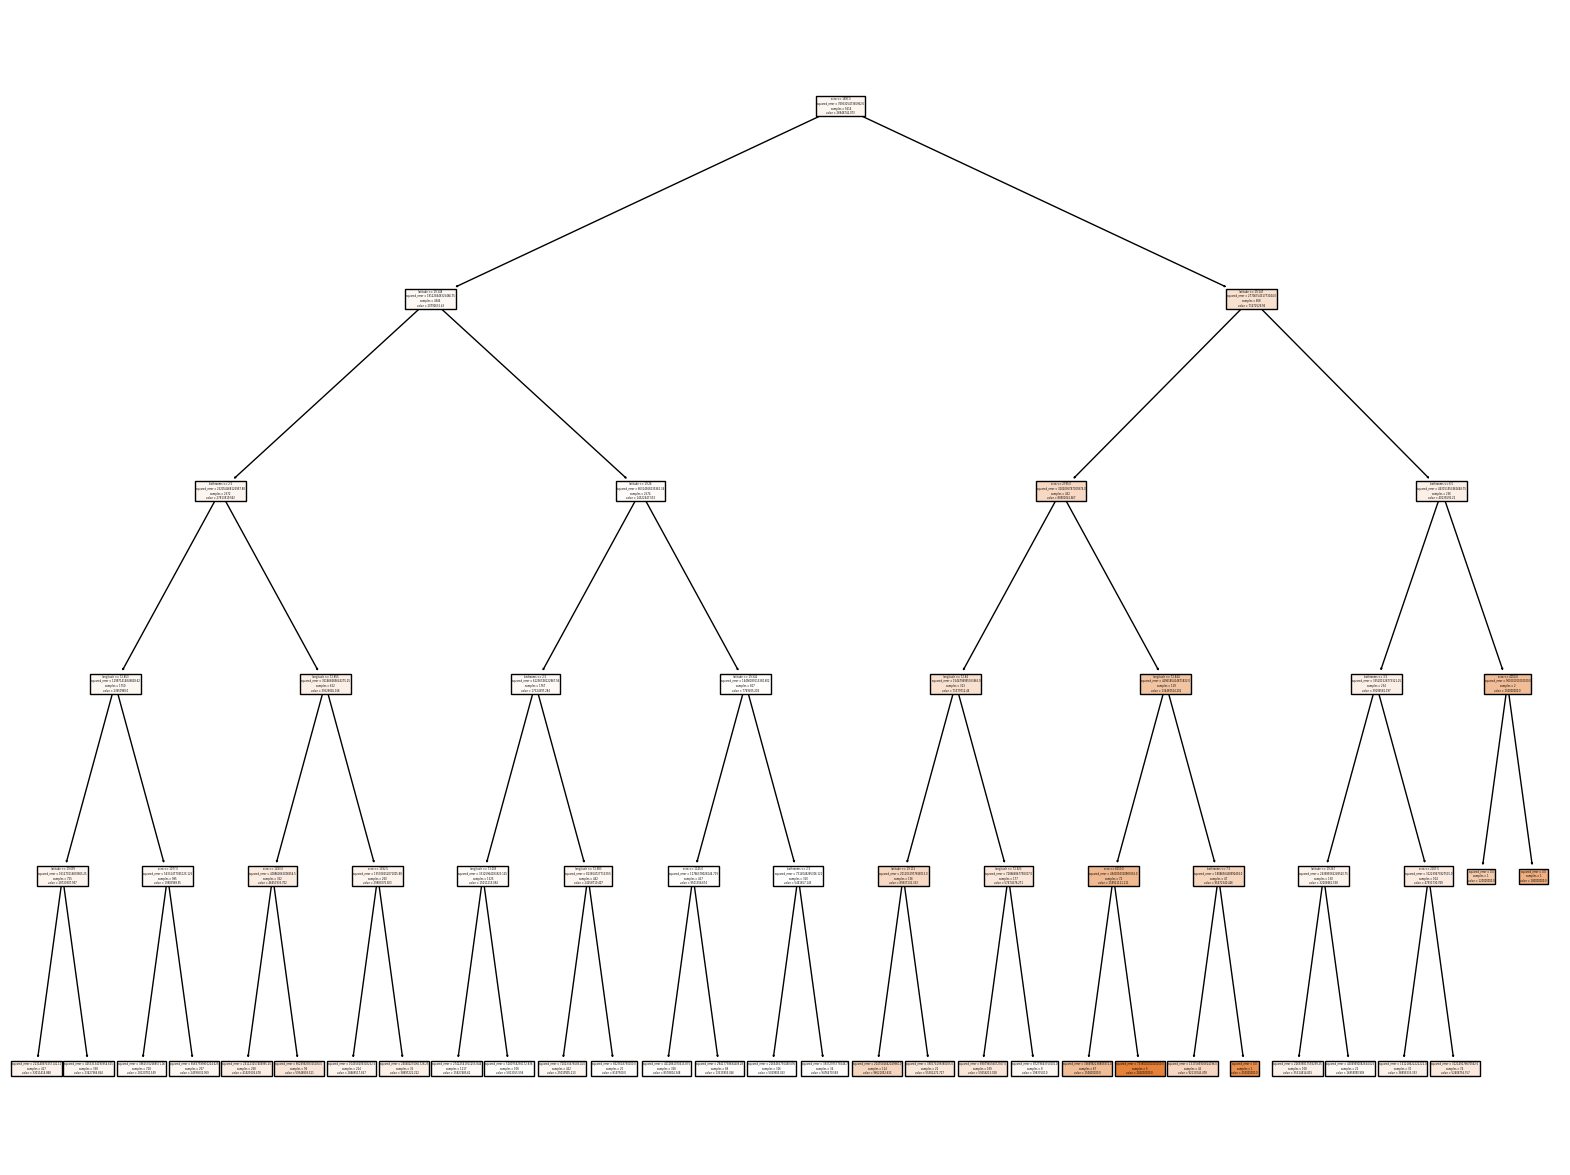

In [14]:
plt.figure(figsize =(20,15))

plot_tree(tree_regression_model, feature_names=X_reg_train.columns, max_depth=5, filled=True);

## Модель для классификации (DecisionTreeClassifier)

In [15]:
data_сlr.drop(columns =['Unnamed: 0'], axis=1, inplace=True)
data_сlr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,23.41,69.47,43.0,1120.0,13105.0,19890.0,931.239,14299.14,45432.26,21592.18,51914.680,30026.438,1.0
1,23.00,70.28,50.0,1137.0,13094.0,19887.0,931.242,14333.69,45018.38,22959.95,51413.852,29590.688,1.0
2,23.66,68.41,52.0,1141.0,13100.0,19882.0,931.251,14149.05,44786.43,21789.97,51167.711,29547.281,1.0
3,25.86,62.03,546.0,1777.0,12872.0,19414.0,931.213,14318.17,44357.90,24472.12,50626.562,28964.852,1.0
4,25.74,62.93,542.0,1710.0,12878.0,19426.0,931.215,14205.93,43765.07,24896.17,49936.551,28499.859,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,13.00,53.20,0.0,400.0,12439.0,19114.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62626,13.06,52.81,0.0,400.0,12448.0,19155.0,939.758,0.00,0.00,0.00,0.000,0.000,0.0
62627,11.81,50.49,31.0,445.0,12545.0,19632.0,939.810,0.00,0.00,0.00,0.001,0.000,0.0
62628,11.69,51.08,28.0,453.0,12548.0,19631.0,939.818,0.00,0.00,0.00,0.001,0.000,0.0


### Выделение целевого признака и предикторов

In [16]:
y_clr = data_сlr["Fire Alarm"]  #целевой признак
X_clr = data_сlr.drop(["Fire Alarm"], axis=1) #предикторы

### Предобработка данных таблицы для классификации

### Балансировка для задачи классификации

In [17]:
#!pip install imbalanced-learn
# 1 - мажоритарный класс (доля примеров слишком высокая)
# 0 - миноритарный класс (доля примеров слишком низкая)
from imblearn.under_sampling import RandomUnderSampler #случайное удаление
#вычисляем количество экземпляров мажоритарного класса, которые нужно удалить
print(f"Количество объектов каждого класса до under_sampling: \n{y_clr.value_counts()}")
underSampler = RandomUnderSampler(sampling_strategy='majority') # пересэмплировать только мажоритарный класс
# удалим некоторое число примеров мажоритарного (большего) класса
X_under_sample, y_under_sample = underSampler.fit_resample(X_clr, y_clr)# повторить выборку 
print(f"Количество объектов каждого класса после under_sampling: \n{y_under_sample.value_counts()}")

Количество объектов каждого класса до under_sampling: 
Fire Alarm
1.0    44757
0.0    17873
Name: count, dtype: int64
Количество объектов каждого класса после under_sampling: 
Fire Alarm
0.0    17873
1.0    17873
Name: count, dtype: int64


### Разбиение данных на обучающую и тестовую выборки

In [18]:
X_clr_train, X_clr_test, y_clr_train, y_clr_test = train_test_split(X_under_sample, y_under_sample, test_size=0.33, random_state=42)
X_clr_train.shape, y_clr_train.shape, X_clr_test.shape, y_clr_test.shape

((23949, 12), (23949,), (11797, 12), (11797,))

In [19]:
y_clr_test

8413     0.0
8525     0.0
19214    1.0
20721    1.0
14573    0.0
        ... 
14667    0.0
1429     0.0
29746    1.0
9048     0.0
10924    0.0
Name: Fire Alarm, Length: 11797, dtype: float64

### Масштабирование (изменение диапазона) числовых признаков 

In [20]:
#Масштабирование - процесс повышения пригодности функций для обучения путем изменения масштаба

#Это необходимый шаг, потому что в большинстве случаев числовые характеристики не имеют определенного диапазона и отличаются друг от друга. 
#Это сильно искажает результаты таких алгоритмов, как метод k-ближайших соседей, которые учитывают расстояния между измерениями.
#А масштабирование позволяет этого избежать. 


**Нормализация**: все значения будут находиться в диапазоне от 0 до 1

Для того, чтобы сделать нормализацию данных нужно посчитать в каждом признаке его минимум (min) и максимум (max), а затем сделать следующее вычисление:

$$x = \frac{x - min}{max - min}$$

После такого преобразования $min = 0, max = 1$.

**Стандартизация**: масштабирует значения с учетом стандартного отклонения.

Для того, чтобы сделать стандартизацию данных нужно посчитать в каждом признаке его среднее значение (`mean`) и стандартное отклонение (`std`), а затем сделать следующее вычисление:

$$x = \frac{x - mean}{std}$$

После такого преобразования $mean = 0, std = 1$.

In [21]:
#нормализация

mms = MinMaxScaler() #инициализируем модель
mms.fit(X_clr_train) #обучаем на обучающей выборке (расчет min и max)

MinMaxScaler()

In [22]:
#нормализируем нашу выборку
#для каждого значения вычтем его минимум и поделим на разницу максимума и минимума
X_train_norms = mms.transform(X_clr_train) #transform возвращает вложенные вычисления в каждой группе
X_test_norms = mms.transform(X_clr_test)
X_train_norms

array([[5.22968025e-01, 6.34502017e-01, 1.84833333e-02, ...,
        2.19251056e-04, 4.10805948e-05, 1.59067090e-06],
       [5.85794484e-03, 5.87806392e-01, 2.23166667e-02, ...,
        2.18925758e-04, 4.10219640e-05, 1.59067090e-06],
       [4.95728582e-01, 6.87247906e-01, 4.71666667e-03, ...,
        2.89515489e-05, 5.43311386e-06, 2.03064370e-07],
       ...,
       [4.36795216e-01, 6.44896060e-01, 2.15000000e-03, ...,
        1.06209896e-04, 1.99149030e-05, 7.78413418e-07],
       [2.92897242e-04, 6.20539870e-03, 1.00000000e+00, ...,
        9.24823074e-03, 1.94470298e-03, 2.94104896e-04],
       [5.78899195e-01, 6.13403661e-01, 0.00000000e+00, ...,
        5.51380623e-05, 1.03385512e-05, 4.06128740e-07]])

In [23]:
X_clr_train = pd.DataFrame(mms.transform(X_clr_train), columns=X_clr_train.columns)
X_clr_test = pd.DataFrame(mms.transform(X_clr_test), columns=X_clr_test.columns)
X_clr_train

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.522968,0.634502,0.018483,0.002483,0.690590,0.679304,0.895216,0.000139,0.000045,0.000219,0.000041,1.590671e-06
1,0.005858,0.587806,0.022317,0.000017,0.737161,0.668800,0.869020,0.000139,0.000045,0.000219,0.000041,1.590671e-06
2,0.495729,0.687248,0.004717,0.000000,0.781499,0.765140,0.955822,0.000018,0.000006,0.000029,0.000005,2.030644e-07
3,0.500659,0.583618,0.003000,0.000570,0.670494,0.858198,0.730492,0.000090,0.000029,0.000143,0.000027,1.049166e-06
4,0.597510,0.571362,0.022600,0.000117,0.727273,0.668800,0.871240,0.000136,0.000045,0.000216,0.000040,1.590671e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
23944,0.461801,0.607819,0.000033,0.000000,0.749282,0.757591,0.987124,0.000022,0.000007,0.000034,0.000006,2.369084e-07
23945,0.171064,0.467732,0.000917,0.000000,0.678150,0.878385,0.734377,0.000130,0.000043,0.000206,0.000039,1.522983e-06
23946,0.436795,0.644896,0.002150,0.000000,0.798405,0.776465,0.977245,0.000067,0.000022,0.000106,0.000020,7.784134e-07
23947,0.000293,0.006205,1.000000,0.018054,0.505582,0.401773,0.651349,0.006015,0.002127,0.009248,0.001945,2.941049e-04


Подбор гиперпарметра **max_depth**

**max_depth** - максимальная глубина дерева

In [24]:
parameters = {'max_depth': np.arange(1, 10, 1)}
clr_optimal = GridSearchCV(DecisionTreeClassifier(), parameters).fit(X_clr_train, y_clr_train)
clr_optimal.best_params_

{'max_depth': 8}

In [25]:
#инициализируем, обучаем и предсказываем
tree_classification_model = DecisionTreeClassifier(max_depth=9).fit(X_clr_train, y_clr_train)

tree_classification_prediction = tree_classification_model.predict(X_clr_test)
tree_classification_prediction

array([0., 0., 1., ..., 1., 0., 0.])

### Метрики качества

$P$ – число истинных результатов, $P = TP + FN$

$N$ – число ложных результатов, $N = TN + FP.$ 

* tp - количество истинных положительных результатов
* fn - количество ложных отрицательных результатов
* tn - количество истинных отрицательных результатов
* fp - количество ложных положительных результатов

In [26]:
#accuracy = (количество верно классифицированных объектов) / (общее количество объектов)
#Оценка точности классификации

#The best value is 1 and the worst value is 0.
#precision = tp / (tp + fp)
#recall = tp / (tp + fn)
#F1 - среднее гармоническое между precision и recall
#F1 = 2 * (precision * recall) / (precision + recall)
print(classification_report(y_clr_test, tree_classification_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5884
         1.0       1.00      1.00      1.00      5913

    accuracy                           1.00     11797
   macro avg       1.00      1.00      1.00     11797
weighted avg       1.00      1.00      1.00     11797



In [27]:
#текстовый отчет, показывающий правила дерева решений
print(tree.export_text(tree_classification_model))

|--- feature_6 <= 0.81
|   |--- feature_6 <= 0.34
|   |   |--- feature_0 <= 0.56
|   |   |   |--- feature_8 <= 0.23
|   |   |   |   |--- feature_5 <= 0.82
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_5 >  0.82
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_8 >  0.23
|   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.56
|   |   |   |--- class: 1.0
|   |--- feature_6 >  0.34
|   |   |--- feature_6 <= 0.75
|   |   |   |--- class: 0.0
|   |   |--- feature_6 >  0.75
|   |   |   |--- feature_3 <= 0.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  0.00
|   |   |   |   |--- class: 1.0
|--- feature_6 >  0.81
|   |--- feature_2 <= 0.00
|   |   |--- feature_9 <= 0.00
|   |   |   |--- feature_0 <= 0.29
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  0.29
|   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  0.00
|   |   |

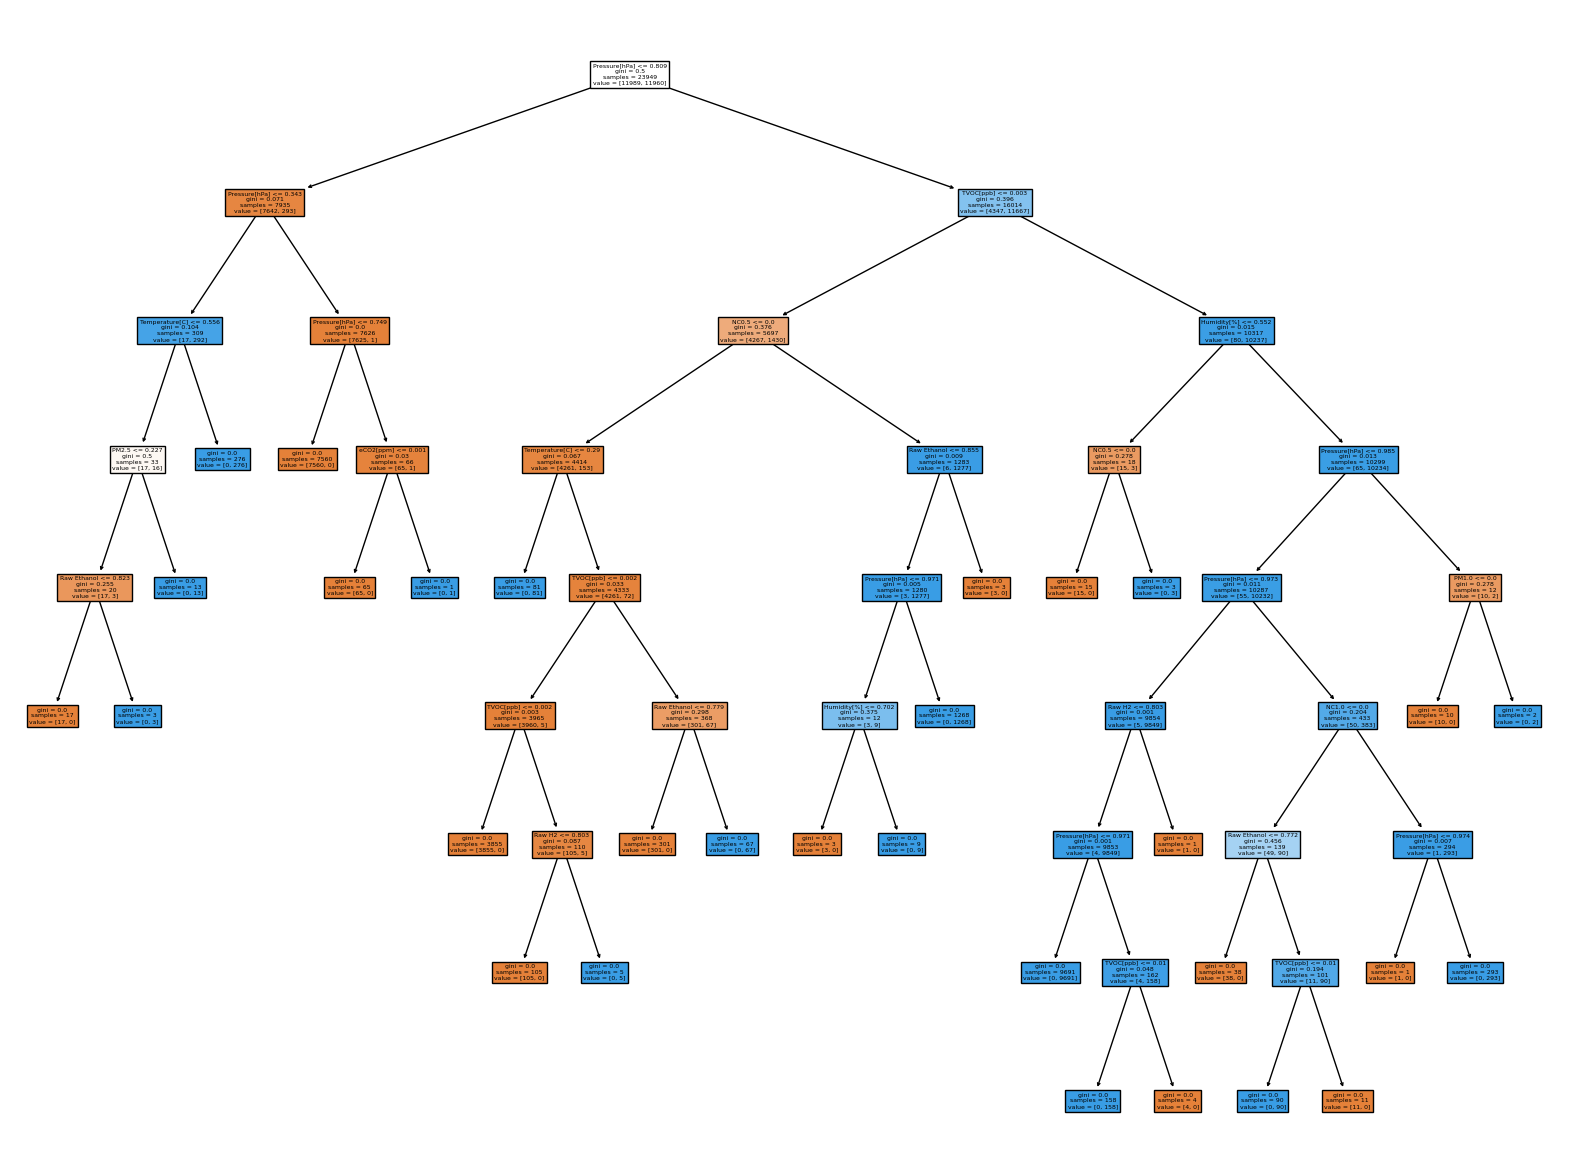

In [28]:
plt.figure(figsize =(20,15))

plot_tree(tree_classification_model, feature_names=X_clr_train.columns, max_depth=9, filled=True);

## Ансамбли

### 1. Бэггинг

### 1.1 BaggingRegressor

In [29]:
#подберем гиперпараметр
#n_estimators - kоличество базовых оценщиков в ансамбле.
parameters = {'n_estimators': np.arange(1, 11, 1)}
bagging_reg_optimal = GridSearchCV(BaggingRegressor(random_state=34), parameters).fit(X_reg_train, y_reg_train)
bagging_reg_optimal.best_params_

{'n_estimators': 10}

In [31]:
#инициализируем, обучаем и предсказываем
bagging_regression_model = BaggingRegressor(n_estimators=10, random_state=34).fit(X_reg_train, y_reg_train)

bagging_regression_prediction = bagging_regression_model.predict(X_reg_test)

In [32]:
#посмотрим метрики
metrics(y_reg_test, bagging_regression_prediction)

MAE: 6430020.032051282
MSE: 157546473412103.78
RMSE: 12551751.80650509
MAPE: 0.5295764377240012
R^2: 0.8185842074559393


### 1.2 BaggingClassifier

In [33]:
#подберем гиперпараметр
#n_estimators - kоличество базовых оценщиков в ансамбле.
parameters = {'n_estimators': np.arange(1, 11, 1)}
bagging_clr_optimal = GridSearchCV(BaggingClassifier(random_state=34), parameters).fit(X_clr_train, y_clr_train)
bagging_clr_optimal.best_params_

{'n_estimators': 10}

In [34]:
bagging_classification_model = BaggingClassifier(n_estimators=9).fit(X_clr_train, y_clr_train)

bagging_classification_prediction = bagging_classification_model.predict(X_clr_test)

In [35]:
print(classification_report(y_clr_test, bagging_classification_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5884
         1.0       1.00      1.00      1.00      5913

    accuracy                           1.00     11797
   macro avg       1.00      1.00      1.00     11797
weighted avg       1.00      1.00      1.00     11797



In [36]:
import pickle

filename = '../models/bagging_classification_model'
pickle.dump(bagging_classification_model, open(filename, 'wb'))

### 2. Бустинг

### 2.1 GradientBoostingRegressor

In [ ]:
boosting_regression_model = GradientBoostingRegressor().fit(X_reg_train, y_reg_train)

boosting_regression_prediction = boosting_regression_model.predict(X_reg_test)

In [ ]:
#посмотрим метрики
metrics(y_reg_test, boosting_regression_prediction)

### 2.2 GradientBoostingClassifier

In [ ]:
boosting_classification_model = GradientBoostingClassifier().fit(X_clr_train, y_clr_train)

boosting_classification_prediction = boosting_classification_model.predict(X_clr_test)

In [ ]:
print(classification_report(y_clr_test, boosting_classification_prediction))

### 3. Стекинг

### 3.1 StackingRegressor

In [ ]:
stacking_regression_model = StackingRegressor(cv=3, estimators=[("ridge", RidgeCV()), ("tree", DecisionTreeRegressor())]).fit(X_reg_train, y_reg_train)

stacking_regression_prediction = stacking_regression_model.predict(X_reg_test)

In [ ]:
#посмотрим метрики
metrics(y_reg_test, boosting_regression_prediction)

### 3.1 StackingClassifier

In [ ]:
stacking_classification_model = StackingClassifier(cv=3, estimators=[("neighbors", KNeighborsClassifier(weights="distance")), ("tree", DecisionTreeClassifier())]).fit(X_clr_train, y_clr_train)

stacking_classification_prediction = stacking_classification_model.predict(X_clr_test)

In [ ]:
print(classification_report(y_clr_test, stacking_classification_prediction))

##  Градиентный бустинг XGBoost для регрессии

In [ ]:
xg_reg = XGBRegressor(max_depth=6).fit(X_reg_train, y_reg_train)
xg_reg_prediction = xg_reg.predict(X_reg_test)

metrics(y_reg_test, xg_reg_prediction)

## Градиентный бустинг XGBoost для классификации

In [ ]:
xg_clr = XGBClassifier().fit(X_clr_train.to_numpy(), y_clr_train.to_numpy())


In [ ]:
xg_clr_prediction = xg_clr.predict(X_clr_test)

print(classification_report(y_clr_test, xg_clr_prediction))

## Обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и классификации.

Алгоритм CART (Classification And Regression Tree)
строит бинарное дерево, где в узлах находится предикат, в листах находится ответ.
Задача -- минимизировать ошибку на каждом листе.

Алгоритм обучения упрощённо можно описать следующим образом:
0. Проверяем критерий остановки
1. Строим всевозможные разбиения на две подвыборки по одному признаку
2. Выбираем лучшее разбиение
3. Возвращаемся к шагу 0 для потомков
4. Проводим отсечение (pruning)


В алгоритме CART каждый узел дерева решений имеет двух потомков. На каждом шаге построения дерева правило, формируемое в узле, делит заданное множество примеров (обучающую выборку) на две части – часть, в которой выполняется правило (потомок – right) и часть, в которой правило не выполняется (потомок – left). Для выбора оптимального правила используется функция оценки качества разбиения.

In [ ]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx    # индекс признака, по которому разбивается вершина
        self.threshold = threshold        # пороговое значение, по которому разбивается вершина
        self.left = left                  # левое поддерево
        self.right = right                # правое поддерево
        self.value = value                # значение в листовой вершине

class DecisionTree:
    
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split   # минимальное количество выборок, необходимых для разделения вершины
        self.max_depth = max_depth                   # максимальная глубина дерева
        self.n_feats = n_feats                       # количество признаков, используемых для разделения вершин
        self.root = None
        
        #Обучаем
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        # Проверяем условие остановки рекурсии
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        # Ищем лучшее разделение признака
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        # Разделяем данные и делаем рекурсивный вызов для левого и правого поддеревьев
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        # Возвращаем новую вершину дерева
        return Node(best_feat, best_thresh, left, right)
        
        # Ищем лучший критерий
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh
    
    def _information_gain(self, y, X_column, split_thresh):
        # Вычисляем энтропию перед разбиением
        parent_entropy = self._entropy(y)
        # Разделяем выборки по пороговому значению
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        # Если разделение не привело к изменению выборок, возвращаем нулевой информационный прирост
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        # Вычисляем энтропию после разбиения
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        # Вычисляем информационный прирост
        ig = parent_entropy - child_entropy
        return ig
    
    def _entropy(self, y):
        # Вычисляем энтропию выборки
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        entropy = -np.sum(probs * np.log2(probs))
        return entropy
    
    def _split(self, X_column, split_thresh):
        # Разделяем выборки по пороговому значению
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    
    def _most_common_label(self, y):
        # Возвращает наиболее часто встречающееся значение в выборке
        _, counts = np.unique(y, return_counts=True)
        return max(zip(_, counts), key=lambda x: x[1])[0]
    
    def predict(self, X):
        # Прогнозируем метки для новых данных
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_idx] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=34, n_clusters_per_class=1)

clf = DecisionTree(max_depth=3)
clf.fit(X, y)

y_pred = clf.predict(X)
print(classification_report(y, y_pred))

In [ ]:
X, y = make_regression(n_samples=1000, n_features=2, noise=1, random_state=42)

clf = DecisionTree(max_depth=3)
clf.fit(X, y)

clf.predict(X)

metrics(y, y_pred)